In [1]:
import numpy as np
import tensorflow as tf

from data import create_data_gaussian, prepare_data_natural
from model import (
    simple_model,
    get_train,
    get_val,
    prepare_data_reweighter,
    prepare_data_refiner,
    apply_reweighter,
    apply_refiner,
    resample,
)
from plotting import plot_raw, plot_n, plot_n_ratio, plot_w, plot_w2, plot_training

bins = np.arange(-3, 3, 0.1)

In [40]:
data = pos, neg, pos_weights, neg_weights = create_data_gaussian(20_000_000, neg_frac=0.9, neg_scale=0.5, neg_weight=-0.01)
plot_raw(data=data, bins=bins)

Epoch 1/3
100000/100000 ━━━━━━━━━━━━━━━━━━━━ 112s 1ms/step - accuracy: 0.4999 - loss: 0.1414 - val_accuracy: 0.4998 - val_loss: 0.1413
Epoch 2/3
100000/100000 ━━━━━━━━━━━━━━━━━━━━ 112s 1ms/step - accuracy: 0.4999 - loss: 0.1407 - val_accuracy: 0.4997 - val_loss: 0.1409
Epoch 3/3
100000/100000 ━━━━━━━━━━━━━━━━━━━━ 114s 1ms/step - accuracy: 0.5001 - loss: 0.1408 - val_accuracy: 0.4997 - val_loss: 0.1409


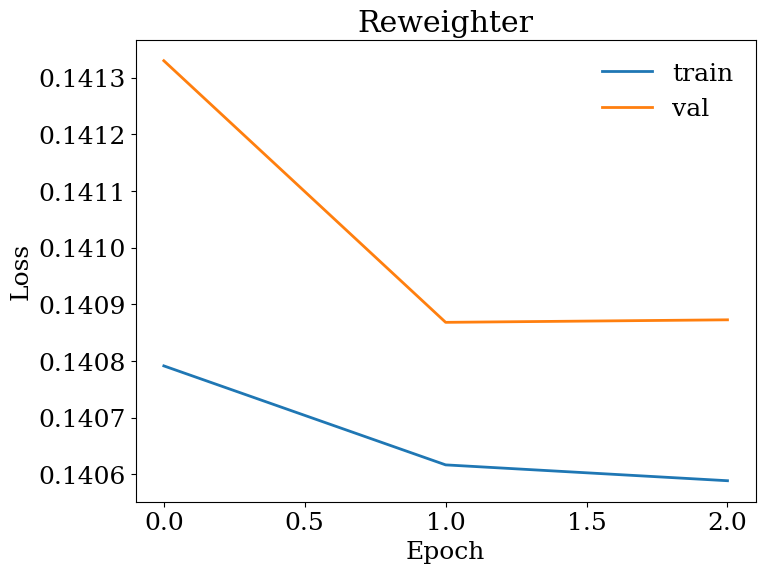

In [42]:
reweighter = simple_model()
reweighter.compile(optimizer="adam", loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), metrics=["accuracy"])
x_train, y_train, w_train, = get_train(*prepare_data_reweighter(*data))
history_reweighter = reweighter.fit(x_train, y_train, sample_weight=w_train, epochs=3, validation_split=0.2, batch_size=256)
plot_training(history_reweighter, title="Reweighter")

Epoch 1/3
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 58s 1ms/step - accuracy: 0.0999 - loss: 0.0285 - val_accuracy: 0.1001 - val_loss: 0.0284
Epoch 2/3
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 57s 1ms/step - accuracy: 0.1000 - loss: 0.0284 - val_accuracy: 0.1001 - val_loss: 0.0284
Epoch 3/3
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 56s 1ms/step - accuracy: 0.0999 - loss: 0.0284 - val_accuracy: 0.1001 - val_loss: 0.0284


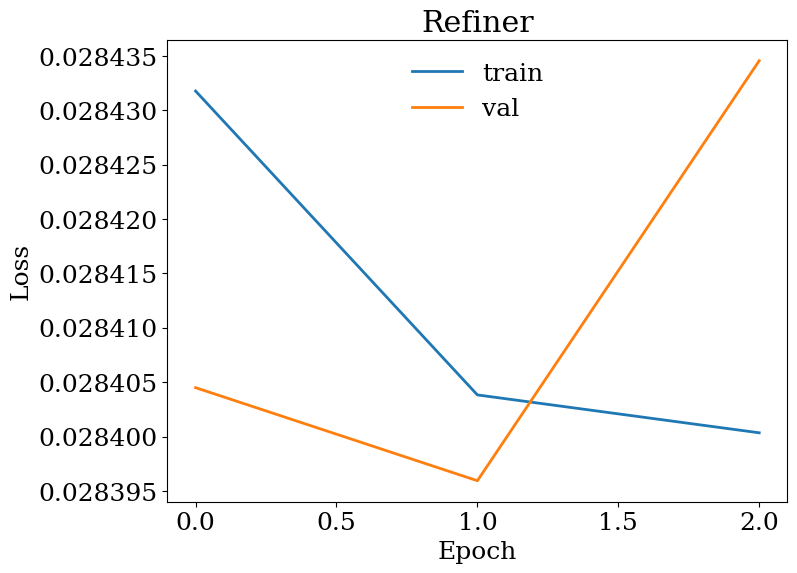

In [43]:
refiner = simple_model()
refiner.compile(optimizer="adam", loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), metrics=["accuracy"])
x_train, y_train, w_train = get_train(*prepare_data_refiner(*data))
history_refiner = refiner.fit(x_train, y_train, sample_weight=w_train, epochs=3, validation_split=0.2, batch_size=256)
plot_training(history_refiner, title="Refiner")

In [44]:
data_natural = get_val(*prepare_data_natural(*data))
data_reweighter = get_val(*apply_reweighter(*data, reweighter=reweighter))
data_refiner = get_val(*apply_refiner(*data, refiner=refiner))

2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step


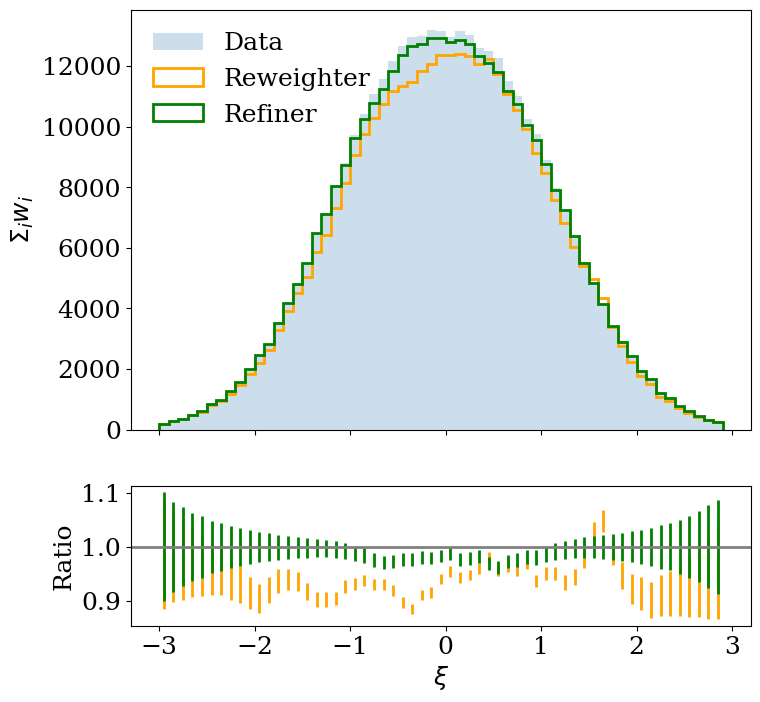

In [45]:
plot_n_ratio(data=data_natural, reweighter=data_reweighter, refiner=data_refiner, bins=bins)

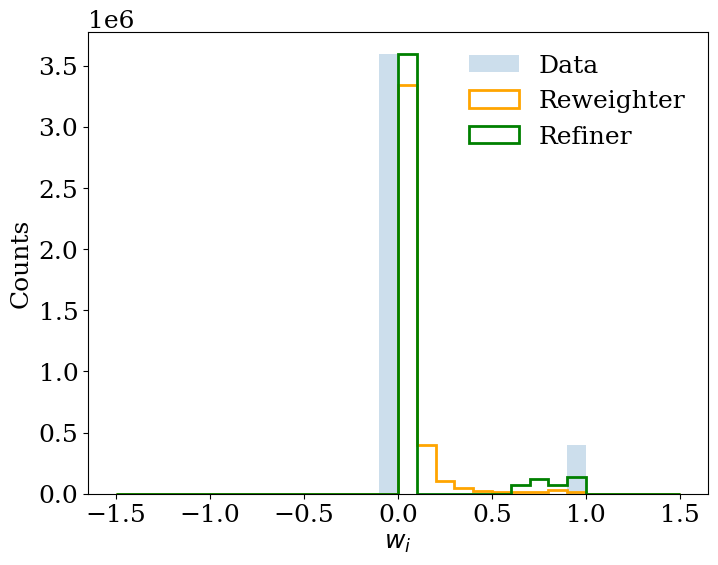

In [46]:
plot_w(data=data_natural, reweighter=data_reweighter, refiner=data_refiner, bins=np.arange(-1.5, 1.6, 0.1))

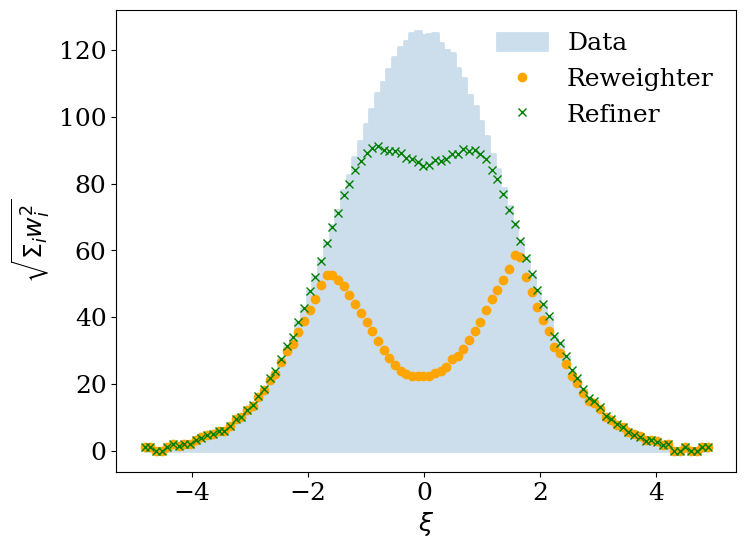

In [47]:
plot_w2(data=data_natural, reweighter=data_reweighter, refiner=data_refiner)

In [48]:
data_reweighter_resampled = resample(*data_reweighter)
data_refiner_resampled = resample(*data_refiner)
len(data_reweighter_resampled[0]), len(data_refiner_resampled[0])

(80694, 280420)

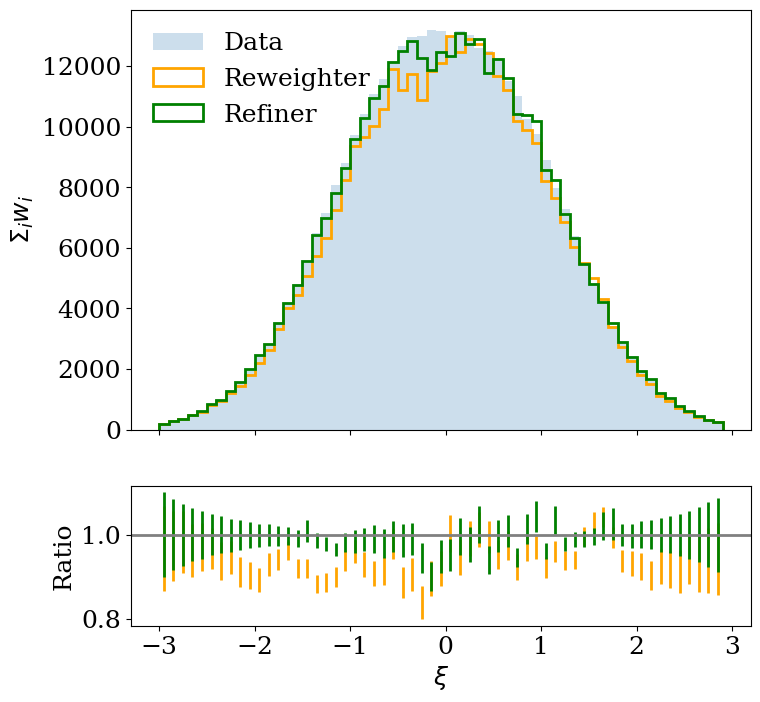

In [49]:
plot_n_ratio(data=data_natural, reweighter=data_reweighter_resampled, refiner=data_refiner_resampled, bins=bins)

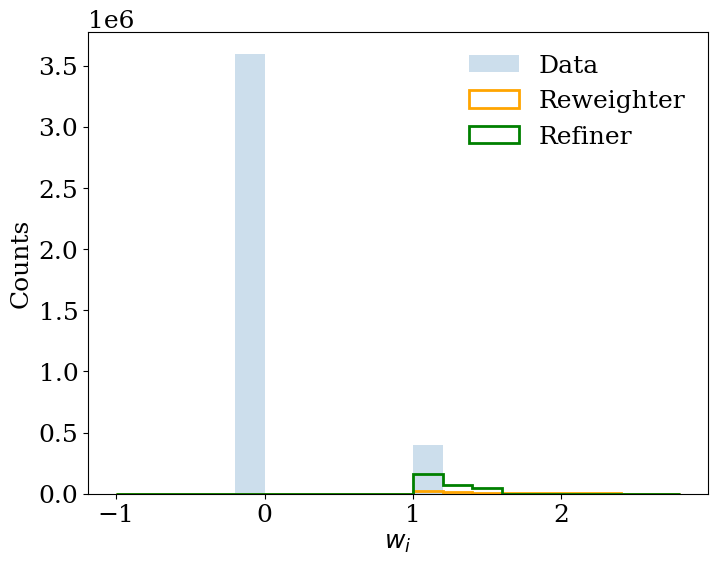

In [50]:
plot_w(data=data_natural, reweighter=data_reweighter_resampled, refiner=data_refiner_resampled, bins=np.arange(-1, 3.0, 0.2))

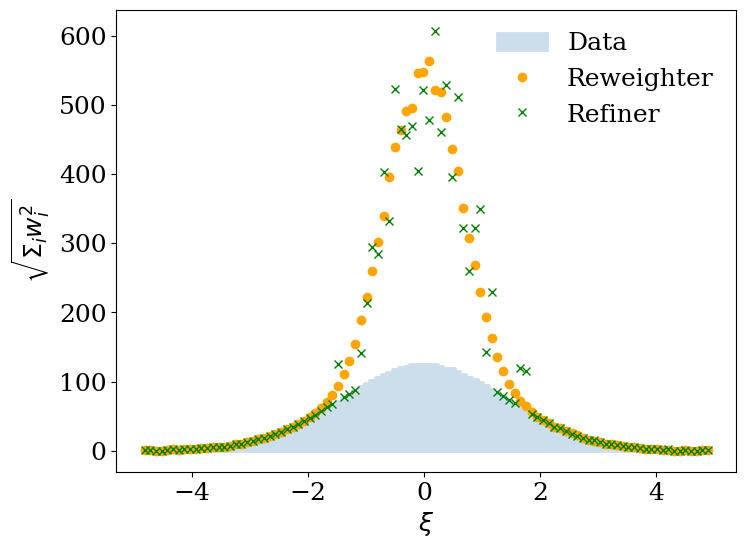

In [51]:
plot_w2(data=data_natural, reweighter=data_reweighter_resampled, refiner=data_refiner_resampled)